## Ejercicios

1. Experimentar con otras tasas de aprendizaje.
2. Generar datos no linealmente separables (probar achicando el valor de 'class_sep' en 'make_classification').
3. Adaptar el algoritmo del perceptrón para que funcione con estos datos (ver variante "pocket" en [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)).
4. Hacer todo con el perceptrón de Scikit-learn ([Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)).


# Contents
- [1. Experimentar con otras tasas de aprendizaje.](#1.-Experimentar-con-otras-tasas-de-aprendizaje.)
- [2. Generar datos no linealmente separables](#2.-Generar-datos-no-linealmente-separables)
- [3. Adaptar el algoritmo del perceptrón](#3.-Adaptar-el-algoritmo-del-perceptrón)
- [4. Hacer todo con el perceptrón de Scikit-learn.](#4.-Hacer-todo-con-el-perceptrón-de-Scikit-learn.)

In [50]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"
import matplotlib.pyplot as plt
import pandas as pd

---

### 1. Experimentar con otras tasas de aprendizaje.
En esta notebook la tasa de aprendizaje es **r**

In [2]:
# vamos a generar un dataset sintetico
from sklearn.datasets import make_classification

sample_size = 100

# notar que la variable X sera un conjunto de pares ordenados x,y que pueden ser representados como punto en un espacio de
# 2 dimensiones. Mientras que y es un conjunto de datos con valores 0 y 1 (luego lo vamos a cambiar por -1 y +1)
X, y_true = make_classification(n_samples = sample_size,
                               n_features = 2,
                               n_classes = 2,
                               n_redundant = 0,
                               n_informative = 2,
                               n_clusters_per_class = 1,
                               class_sep = 0.5,
                               random_state = 1)

In [3]:
X[:10] # vemos una muestra de 10 elementos del array X

array([[-0.54948638,  0.3786438 ],
       [ 0.3780991 ,  0.39551051],
       [ 0.45928819,  0.53967316],
       [-0.68013412,  0.62062155],
       [-0.40731836,  0.56040861],
       [-0.12754626,  0.87661405],
       [ 0.32178321,  0.68947778],
       [-0.70376927,  0.28801845],
       [ 0.27151441, -0.154284  ],
       [ 0.006143  ,  1.16752297]])

In [4]:
y_true

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [5]:
type(X), X.shape, y_true.shape

(numpy.ndarray, (100, 2), (100,))

In [6]:
y_true==1

array([ True, False, False,  True,  True,  True, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
        True])

In [7]:
# vamos a modificar la variable y_true de forma tal que los valores 0 pasena ser -1.
y_true[y_true == 0] = -1
y_true

array([ 1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1])

Graficamos para ver el resultado. Acá, los azules son 1, los rojos -1.

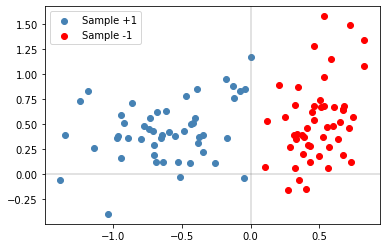

In [8]:
# graficamos los puntos correspondientes al grupo +1
plt.scatter(x = X[y_true == 1, 0],
           y = X[y_true == 1, 1],
           color = 'steelblue',
           label = 'Sample +1')

# graficamos los puntos correspondientes al grupo -1
plt.scatter(x = X[y_true == -1, 0],
           y = X[y_true == -1, 1],
           color = 'red',
           label = 'Sample -1')

plt.axvline(x = 0,
           color = 'grey',
           alpha = 0.3)
plt.axhline(y = 0,
           color = 'gray',
           alpha = 0.3)

plt.legend()
plt.show()

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [9]:
# tomamos el vector y_true y lo dividimos en grupo de entrenamiento y de validacion
y_train = y_true[:int(0.6 * sample_size)]
y_val = y_true[int(0.6 * sample_size):]


y_train.shape , y_val.shape

((60,), (40,))

In [10]:
from sklearn.model_selection import train_test_split # Allowed inputs are lists, numpy arrays,
                                                     # scipy-sparse matrices or pandas dataframes

# definimos los tamanios de los grupos
train_size = int(0.6 * sample_size)
validation_size = sample_size - train_size

# hacemos la division de la muestrs usando la clase sklearn.model_selection.train_test_split
train_val_split = train_test_split(X,
                                   train_size=train_size,
                                   random_state=0,
                                   shuffle=False)

In [11]:
X_train = train_val_split[0]
X_val = train_val_split[1]
X_train.shape, X_val.shape

((60, 2), (40, 2))

Definimos las funciones `predict`,  `accuracy` y `predfun` que vamos a necesitar mas adelante

In [12]:
def predict(X, w):
    return np.sign(np.dot(X,w)) # el signo del producto punto de los vectores X y w

def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum()/y_true.shape[0]


In [13]:
# nuevamente comenzamos desde un vector al azar. Elegimos el vector w = 1,1

r_values =  [0.1, 0.5, 1.0, 2.0, 20.0, 200.0] # probamos con diferentes valores de r
for r in  r_values:
    print(f'r = {r}')
    w = np.ones(2)
    step = 0
    finished = False

    while not finished:
        # 1. predecir usando el modelo actual
        y_pred = predict(X_train, w)
        y_val_pred = predict(X_val, w)

        # 2. evaluar
        train_acc = accuracy(y_train, y_pred)
        val_acc = accuracy(y_val, y_val_pred)
        print(f'step={step}\ttrain_acc={train_acc:0.2}\tval_acc={val_acc:0.2}')

        # 3. si no clasifica todo bien, actualizar modelo
        if (y_train == y_pred).all():
            finished = True
        else:
            indices = np.where(y_train != y_pred)
            i = indices[0][0]
            xi, yi = X_train[i], y_train[i]
            w = w + r * xi * yi

            step = step + 1
    print(f'For r = {r}: Parametros del modelo: {w}')

r = 0.1
step=0	train_acc=0.17	val_acc=0.1
step=1	train_acc=0.2	val_acc=0.1
step=2	train_acc=0.22	val_acc=0.12
step=3	train_acc=0.25	val_acc=0.12
step=4	train_acc=0.3	val_acc=0.12
step=5	train_acc=0.3	val_acc=0.12
step=6	train_acc=0.3	val_acc=0.12
step=7	train_acc=0.3	val_acc=0.12
step=8	train_acc=0.3	val_acc=0.15
step=9	train_acc=0.32	val_acc=0.17
step=10	train_acc=0.33	val_acc=0.17
step=11	train_acc=0.33	val_acc=0.23
step=12	train_acc=0.33	val_acc=0.25
step=13	train_acc=0.37	val_acc=0.25
step=14	train_acc=0.37	val_acc=0.28
step=15	train_acc=0.37	val_acc=0.28
step=16	train_acc=0.37	val_acc=0.28
step=17	train_acc=0.37	val_acc=0.28
step=18	train_acc=0.38	val_acc=0.3
step=19	train_acc=0.43	val_acc=0.3
step=20	train_acc=0.47	val_acc=0.3
step=21	train_acc=0.47	val_acc=0.33
step=22	train_acc=0.48	val_acc=0.38
step=23	train_acc=0.5	val_acc=0.45
step=24	train_acc=0.5	val_acc=0.47
step=25	train_acc=0.5	val_acc=0.5
step=26	train_acc=0.53	val_acc=0.55
step=27	train_acc=0.57	val_acc=0.57
step=28	t

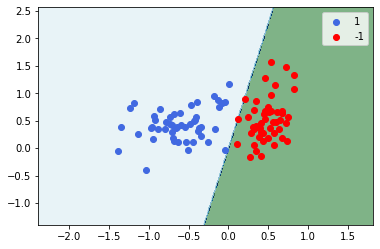

In [14]:
from utils import plot_decision_boundary
# tener presente que el archivo utils.py tiene que estar en la misma carpeta donde se esta corriendo esa notebook

def predfun(x):
    return predict(x, w)


plot_decision_boundary(predfun, 
                       X, 
                       y_true)

---

### 2. Generar datos no linealmente separables 
(probar achicando el valor de `class_sep` en `make_classification`).

class_sep: float, default=1.0
The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

In [15]:
# vamos a generar un dataset sintetico
from sklearn.datasets import make_classification

sample_size = 100

# notar que la variable X sera un conjunto de pares ordenados x,y que pueden ser representados como punto en un espacio de
# 2 dimensiones. Mientras que y es un conjunto de datos con valores 0 y 1 (luego lo vamos a cambiar por -1 y +1)
X, y_true = make_classification(n_samples = sample_size,
                               n_features = 2,
                               n_classes = 2,
                               n_redundant = 0,
                               n_informative = 2,
                               n_clusters_per_class = 1,
                               class_sep = 0.25,
                               random_state = 1)

In [16]:
# vamos a modificar la variable y_true de forma tal que los valores 0 pasena ser -1.
y_true[y_true == 0] = -1
y_true

array([ 1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1])

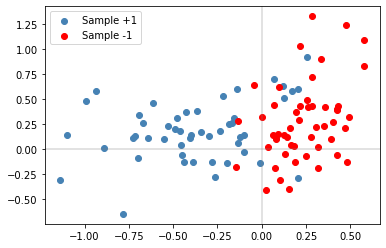

In [17]:
# graficamos los puntos correspondientes al grupo +1
plt.scatter(x = X[y_true == 1, 0],
           y = X[y_true == 1, 1],
           color = 'steelblue',
           label = 'Sample +1')

# graficamos los puntos correspondientes al grupo -1
plt.scatter(x = X[y_true == -1, 0],
           y = X[y_true == -1, 1],
           color = 'red',
           label = 'Sample -1')

plt.axvline(x = 0,
           color = 'grey',
           alpha = 0.3)
plt.axhline(y = 0,
           color = 'gray',
           alpha = 0.3)

plt.legend()
plt.show()

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [18]:
# tomamos el vector y_true y lo dividimos en grupo de entrenamiento y de validacion
y_train = y_true[:int(0.6 * sample_size)]
y_val = y_true[int(0.6 * sample_size):]


y_train.shape , y_val.shape

((60,), (40,))

In [19]:
from sklearn.model_selection import train_test_split # Allowed inputs are lists, numpy arrays,
                                                     # scipy-sparse matrices or pandas dataframes

# definimos los tamanios de los grupos
train_size = int(0.6 * sample_size)
validation_size = sample_size - train_size

# hacemos la division de la muestrs usando la clase sklearn.model_selection.train_test_split
train_val_split = train_test_split(X,
                                   train_size=train_size,
                                   random_state=0,
                                   shuffle=False)

In [20]:
X_train = train_val_split[0]
X_val = train_val_split[1]
X_train.shape, X_val.shape

((60, 2), (40, 2))

In [21]:
# nuevamente comenzamos desde un vector al azar. Elegimos el vector w = 1,1

r_values =  [0.5] # probamos con diferentes valores de r
for r in  r_values:
    print(f'r = {r}')
    w = np.ones(2)
    step = 0
    finished = False

    while not finished:
        # 1. predecir usando el modelo actual
        y_pred = predict(X_train, w)
        y_val_pred = predict(X_val, w)

        # 2. evaluar
        train_acc = accuracy(y_train, y_pred)
        val_acc = accuracy(y_val, y_val_pred)
        print(f'step={step}\ttrain_acc={train_acc:0.2}\tval_acc={val_acc:0.2}')

        # 3. si no clasifica todo bien, actualizar modelo
        if (y_train == y_pred).all():
            finished = True
        else:
            indices = np.where(y_train != y_pred)
            i = indices[0][0]
            xi, yi = X_train[i], y_train[i]
            w = w + r * xi * yi

            step = step + 1
    print(f'For r = {r}: Parametros del modelo: {w}')

r = 0.5
step=0	train_acc=0.2	val_acc=0.17
step=1	train_acc=0.23	val_acc=0.17
step=2	train_acc=0.27	val_acc=0.23
step=3	train_acc=0.32	val_acc=0.3
step=4	train_acc=0.4	val_acc=0.35
step=5	train_acc=0.4	val_acc=0.35
step=6	train_acc=0.43	val_acc=0.38
step=7	train_acc=0.43	val_acc=0.38
step=8	train_acc=0.48	val_acc=0.4
step=9	train_acc=0.5	val_acc=0.42
step=10	train_acc=0.52	val_acc=0.42
step=11	train_acc=0.52	val_acc=0.45
step=12	train_acc=0.55	val_acc=0.47
step=13	train_acc=0.6	val_acc=0.55
step=14	train_acc=0.62	val_acc=0.57
step=15	train_acc=0.65	val_acc=0.62
step=16	train_acc=0.68	val_acc=0.78
step=17	train_acc=0.78	val_acc=0.78
step=18	train_acc=0.92	val_acc=0.8
step=19	train_acc=0.9	val_acc=0.85
step=20	train_acc=0.87	val_acc=0.85
step=21	train_acc=0.92	val_acc=0.85
step=22	train_acc=0.8	val_acc=0.75
step=23	train_acc=0.93	val_acc=0.8
step=24	train_acc=0.7	val_acc=0.8
step=25	train_acc=0.8	val_acc=0.75
step=26	train_acc=0.92	val_acc=0.8
step=27	train_acc=0.7	val_acc=0.8
step=28	tra

step=483	train_acc=0.83	val_acc=0.78
step=484	train_acc=0.88	val_acc=0.8
step=485	train_acc=0.92	val_acc=0.85
step=486	train_acc=0.9	val_acc=0.88
step=487	train_acc=0.93	val_acc=0.8
step=488	train_acc=0.83	val_acc=0.78
step=489	train_acc=0.9	val_acc=0.8
step=490	train_acc=0.78	val_acc=0.78
step=491	train_acc=0.9	val_acc=0.85
step=492	train_acc=0.93	val_acc=0.82
step=493	train_acc=0.87	val_acc=0.82
step=494	train_acc=0.93	val_acc=0.8
step=495	train_acc=0.8	val_acc=0.75
step=496	train_acc=0.9	val_acc=0.82
step=497	train_acc=0.92	val_acc=0.85
step=498	train_acc=0.87	val_acc=0.85
step=499	train_acc=0.93	val_acc=0.8
step=500	train_acc=0.8	val_acc=0.78
step=501	train_acc=0.88	val_acc=0.8
step=502	train_acc=0.92	val_acc=0.85
step=503	train_acc=0.87	val_acc=0.85
step=504	train_acc=0.93	val_acc=0.8
step=505	train_acc=0.83	val_acc=0.78
step=506	train_acc=0.9	val_acc=0.8
step=507	train_acc=0.73	val_acc=0.8
step=508	train_acc=0.87	val_acc=0.85
step=509	train_acc=0.92	val_acc=0.8
step=510	train_acc

KeyboardInterrupt: 

Notar que los grupos no son linealmente separables, es decir que no se puede estrablecer una frontera entre ellos, el bloque anterior corre en forma indefinida hast que lo frenamos manualmente.
El resultado que obtenemos, por supuesto que no encuentra parametros par definir el vector w que separe a los dos grupos.

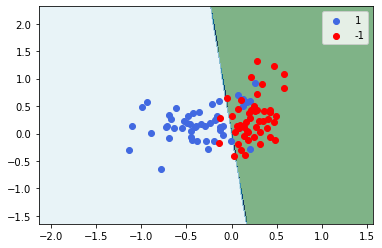

In [22]:
from utils import plot_decision_boundary
# tener presente que el archivo utils.py tiene que estar en la misma carpeta donde se esta corriendo esa notebook

def predfun(x):
    return predict(x, w)


plot_decision_boundary(predfun, 
                       X, 
                       y_true)

### 3. Adaptar el algoritmo del perceptrón
para que funcione con estos datos (ver variante "pocket" en [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)).

In [51]:
# vamos a generar un dataset sintetico
from sklearn.datasets import make_classification

sample_size = 100

# notar que la variable X sera un conjunto de pares ordenados x,y que pueden ser representados como punto en un espacio de
# 2 dimensiones. Mientras que y es un conjunto de datos con valores 0 y 1 (luego lo vamos a cambiar por -1 y +1)
X, y_true = make_classification(n_samples = sample_size,
                               n_features = 2,
                               n_classes = 2,
                               n_redundant = 0,
                               n_informative = 2,
                               n_clusters_per_class = 1,
                               class_sep = 0.25,
                               random_state = 1)

In [52]:
# vamos a modificar la variable y_true de forma tal que los valores 0 pasena ser -1.
y_true[y_true == 0] = -1
y_true

array([ 1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1])

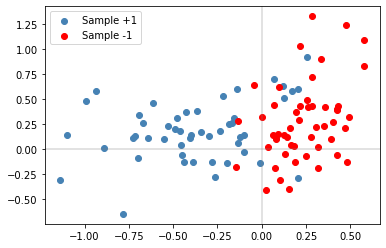

In [53]:
# graficamos los puntos correspondientes al grupo +1
plt.scatter(x = X[y_true == 1, 0],
           y = X[y_true == 1, 1],
           color = 'steelblue',
           label = 'Sample +1')

# graficamos los puntos correspondientes al grupo -1
plt.scatter(x = X[y_true == -1, 0],
           y = X[y_true == -1, 1],
           color = 'red',
           label = 'Sample -1')

plt.axvline(x = 0,
           color = 'grey',
           alpha = 0.3)
plt.axhline(y = 0,
           color = 'gray',
           alpha = 0.3)

plt.legend()
plt.show()

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [54]:
# tomamos el vector y_true y lo dividimos en grupo de entrenamiento y de validacion
y_train = y_true[:int(0.6 * sample_size)]
y_val = y_true[int(0.6 * sample_size):]


y_train.shape , y_val.shape

((60,), (40,))

In [55]:
from sklearn.model_selection import train_test_split # Allowed inputs are lists, numpy arrays,
                                                     # scipy-sparse matrices or pandas dataframes

# definimos los tamanios de los grupos
train_size = int(0.6 * sample_size)
validation_size = sample_size - train_size

# hacemos la division de la muestrs usando la clase sklearn.model_selection.train_test_split
train_val_split = train_test_split(X,
                                   train_size=train_size,
                                   random_state=0,
                                   shuffle=False)

In [56]:
X_train = train_val_split[0]
X_val = train_val_split[1]
X_train.shape, X_val.shape

((60, 2), (40, 2))

In [57]:
# nuevamente comenzamos desde un vector al azar. Elegimos el vector w = 1,1
w = np.ones(2)
r = 1  # lo seteamos en 1
step = 0
finished = False
val_w_dic = {}

while not finished and step <= 100:
    # 1. predecir usando el modelo actual
    y_pred = predict(X_train, w)
    y_val_pred = predict(X_val, w)
    
    # 2. evaluar
    train_acc = accuracy(y_train, y_pred)
    val_acc = accuracy(y_val, y_val_pred)
    val_w_dic[val_acc] = None
    print(f'step={step}\ttrain_acc={train_acc:0.2}\tval_acc={val_acc:0.2}')

    # 3. si no clasifica todo bien, actualizar modelo
    if (y_train == y_pred).all(): # si esta linea es True se ejecuta la linea siguiente, sino el else
        finished = True
    else:
        indices = np.where(y_train != y_pred)
        i = indices[0][0]
        xi, yi = X_train[i], y_train[i]
        w = w + r * xi * yi
        val_w_dic[val_acc] = w
        
        step = step + 1
print(f'\nParametros del modelo:\n>> max accuracy for Validation group: {max(val_w_dic.keys())}\n>> Model parameters: {val_w_dic[max(val_w_dic.keys())]}')

step=0	train_acc=0.2	val_acc=0.17
step=1	train_acc=0.27	val_acc=0.23
step=2	train_acc=0.4	val_acc=0.35
step=3	train_acc=0.43	val_acc=0.38
step=4	train_acc=0.48	val_acc=0.4
step=5	train_acc=0.52	val_acc=0.42
step=6	train_acc=0.55	val_acc=0.47
step=7	train_acc=0.62	val_acc=0.57
step=8	train_acc=0.68	val_acc=0.78
step=9	train_acc=0.87	val_acc=0.82
step=10	train_acc=0.9	val_acc=0.82
step=11	train_acc=0.68	val_acc=0.8
step=12	train_acc=0.87	val_acc=0.82
step=13	train_acc=0.9	val_acc=0.85
step=14	train_acc=0.7	val_acc=0.8
step=15	train_acc=0.87	val_acc=0.82
step=16	train_acc=0.92	val_acc=0.85
step=17	train_acc=0.73	val_acc=0.8
step=18	train_acc=0.88	val_acc=0.82
step=19	train_acc=0.9	val_acc=0.85
step=20	train_acc=0.83	val_acc=0.78
step=21	train_acc=0.93	val_acc=0.82
step=22	train_acc=0.73	val_acc=0.8
step=23	train_acc=0.9	val_acc=0.85
step=24	train_acc=0.92	val_acc=0.85
step=25	train_acc=0.83	val_acc=0.78
step=26	train_acc=0.93	val_acc=0.8
step=27	train_acc=0.73	val_acc=0.8
step=28	train_ac

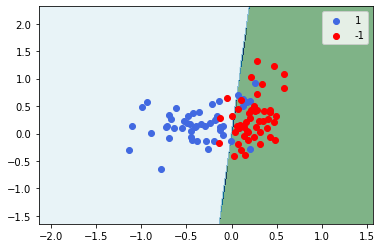

In [58]:
from utils import plot_decision_boundary
# tener presente que el archivo utils.py tiene que estar en la misma carpeta donde se esta corriendo esa notebook

def predfun(x):
    return predict(x, w)


plot_decision_boundary(predfun, 
                       X, 
                       y_true)

---
### 4. Hacer todo con el perceptrón de Scikit-learn.


In [30]:
# vamos a generar un dataset sintetico
from sklearn.datasets import make_classification

sample_size = 100

# notar que la variable X sera un conjunto de pares ordenados x,y que pueden ser representados como punto en un espacio de
# 2 dimensiones. Mientras que y es un conjunto de datos con valores 0 y 1 (luego lo vamos a cambiar por -1 y +1)
data, y_true = make_classification(n_samples = sample_size,
                               n_features = 2,
                               n_classes = 2,
                               n_redundant = 0,
                               n_informative = 2,
                               n_clusters_per_class = 1,
                               class_sep = 0.5,
                               random_state = 1)

In [31]:
# no necesitamos que los datos esten en forma de DF, pero a fines de visualizar la estrutura de los datos va a ser util
data_df = pd.DataFrame(data = data,
                   columns = ['Xx','Xy'])
data_df

,Xx,Xy
0,-0.549486,0.378644
1,0.378099,0.395511
2,0.459288,0.539673
3,-0.680134,0.620622
4,-0.407318,0.560409
...,...,...
95,0.251481,0.567029
96,-0.864191,0.716191
97,-0.689138,0.123689
98,0.350638,-0.053105


In [32]:
y_true

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [33]:
# vamos a modificar la variable y de forma tal de tener valores +1 y -1
y_true[y_true == 0] = -1
y_true

array([ 1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1])

In [34]:
data_df['y_true'] = y_true
data_df

,Xx,Xy,y_true
0,-0.549486,0.378644,1
1,0.378099,0.395511,-1
2,0.459288,0.539673,-1
3,-0.680134,0.620622,1
4,-0.407318,0.560409,1
...,...,...,...
95,0.251481,0.567029,-1
96,-0.864191,0.716191,1
97,-0.689138,0.123689,1
98,0.350638,-0.053105,-1


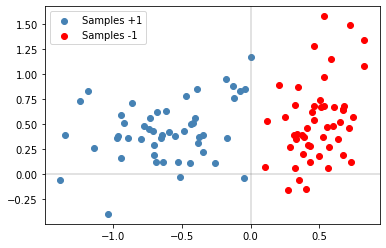

In [35]:
# graficamos los puntos correspondientes al grupo +1
plt.scatter(data = data_df[y_true == 1],
            x = 'Xx',
            y = 'Xy',
           color = 'steelblue',
           label = 'Samples +1')

# graficamos los puntos correspondientes al grupo -1
plt.scatter(data = data_df[y_true == -1],
            x = 'Xx',
           y = 'Xy',
           color = 'red',
           label = 'Samples -1')

plt.axvline(x = 0,
           color = 'grey',
           alpha = 0.3)
plt.axhline(y = 0,
           color = 'gray',
           alpha = 0.3)

plt.legend()
plt.show()

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [36]:
from sklearn.model_selection import train_test_split # Allowed inputs are lists, numpy arrays,
                                                     # scipy-sparse matrices or pandas dataframes

# definimos los tamanios de los grupos
train_size = int(0.8 * sample_size)
validation_size = sample_size - train_size

# hacemos la division de la muestrs usando la clase sklearn.model_selection.train_test_split
train_val_split = train_test_split(data_df,
                                   train_size=train_size,
                                   random_state=0,
                                   shuffle=True)
train_val_split

[          Xx        Xy  y_true
 43  0.408526  0.467037      -1
 62 -0.799362  0.353356       1
 3  -0.680134  0.620622       1
 71  0.325507  0.058539      -1
 45  0.557655  0.471395      -1
 ..       ...       ...     ...
 96 -0.864191  0.716191       1
 67  0.436403  0.123629      -1
 64  0.286557  0.275285      -1
 47 -0.730176  0.565233       1
 44 -0.047062 -0.032602       1
 
 [80 rows x 3 columns],
           Xx        Xy  y_true
 26  0.464351  1.275477      -1
 86  0.117714  0.528175      -1
 2   0.459288  0.539673      -1
 55  0.825514  1.338294      -1
 75 -0.941891  0.594885       1
 93  0.678994  0.678673      -1
 16 -0.468540  0.779914       1
 73 -0.637429  0.121531       1
 54 -1.184508  0.828579       1
 95  0.251481  0.567029      -1
 53 -0.389488  0.847286       1
 92  0.567964  0.063078      -1
 78 -1.388740 -0.058810       1
 13  0.403945 -0.145866      -1
 7  -0.703769  0.288018       1
 30 -0.530489  0.118390       1
 22 -0.890030  0.357720       1
 24  0.723827 

In [37]:
train_data = train_val_split[0]
train_data

,Xx,Xy,y_true
43,0.408526,0.467037,-1
62,-0.799362,0.353356,1
3,-0.680134,0.620622,1
71,0.325507,0.058539,-1
45,0.557655,0.471395,-1
...,...,...,...
96,-0.864191,0.716191,1
67,0.436403,0.123629,-1
64,0.286557,0.275285,-1
47,-0.730176,0.565233,1


In [38]:
val_data = train_val_split[1]
val_data

,Xx,Xy,y_true
26,0.464351,1.275477,-1
86,0.117714,0.528175,-1
2,0.459288,0.539673,-1
55,0.825514,1.338294,-1
75,-0.941891,0.594885,1
93,0.678994,0.678673,-1
16,-0.468540,0.779914,1
73,-0.637429,0.121531,1
54,-1.184508,0.828579,1
95,0.251481,0.567029,-1


In [39]:
train_data.shape, val_data.shape

((80, 3), (20, 3))

In [40]:
train_data[['Xx', 'Xy']]

,Xx,Xy
43,0.408526,0.467037
62,-0.799362,0.353356
3,-0.680134,0.620622
71,0.325507,0.058539
45,0.557655,0.471395
...,...,...
96,-0.864191,0.716191
67,0.436403,0.123629
64,0.286557,0.275285
47,-0.730176,0.565233


In [41]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train_data[['Xx','Xy']], train_data['y_true'])

Perceptron()

In [42]:
clf.score(train_data[['Xx','Xy']], train_data['y_true'])

1.0

In [43]:
# aplicamos el modelo obtenido sobre el grupo de entrenamiento
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data[['Xx','Xy']])
predictions_train

array([-1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1])

In [44]:
# aplicamos el modelo obtenido sobre el grupo de validacion
predictions_val = clf.predict(val_data[['Xx','Xy']])
predictions_val

array([-1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1])

In [45]:
train_data_y_true = train_data.iloc[:,2].values
train_data_y_true

array([-1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1])

In [46]:
val_data_y_true = val_data.iloc[:,2].values
val_data_y_true

array([-1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1])

In [47]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum()/y_true.shape[0]

In [48]:
train_accuracy = accuracy(train_data_y_true, predictions_train)
train_accuracy

1.0

In [49]:
val_accuracy = accuracy(val_data_y_true, predictions_val)
val_accuracy

0.95

**Obtuvimos un accuracy del 95% !!!**